## Objective

We create a portfolio of stocks from American markets, analyze their performance and try to acess the risk in future.


### Building the porfolio

We will build a tech dominant portfolio to analyze including companies like Apple, Microsoft, Google etc.



In [21]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd 


# List of stock symbols
tech_stocks = ['AAPL', 'MSFT', 'AMZN', 'GOOGL', 'META']

# Set the date range for the historical data
start_date = '2020-08-01'
end_date = '2023-08-01'

# Download historical stock data for each stock

stocks = yf.download(tech_stocks, start_date, end_date)['Close']



[*********************100%%**********************]  5 of 5 completed


## Portfolio construction

To assign the weight of each of the company stock we calculate the market capitalisation.
To get the market value we need to know the last price of the security traded and the number of shares outstanding. yfinance gives the market cap directly.

For this, it is important to have a benchmark that can be used as a reference for the securities.

In [22]:
totalmp = 0
mcap=[]
for stock in tech_stocks:
    # Create a Ticker object
    # Create a Ticker object
    ticker = yf.Ticker(stock)

    # Fetch company information
    company_info = ticker.info

    # Get the market capitalization
    market_cap = company_info.get('marketCap', None)
    mcap.append(market_cap)
    totalmp += market_cap

weights = [mc/totalmp for mc in mcap]
print(weights)

[0.3174813752091255, 0.2629812984283075, 0.1530503049106324, 0.18437709035962263, 0.08210993109231199]


### Portfolio standard deviation

$\sigma_{port} = \sqrt{w_{t}\Sigma w}$

$\Sigma$ is covariance matrix and w's are weights 

In [24]:
# stock return
stocks_return  =  (stocks/stocks.shift(1))
# covariance of stocks
cov_matrix = stocks_return.cov()

# Annual portfolio covariance
cov_annual = cov_matrix * 252

# portfolio standard deviation

port_std = np.sqrt(np.dot(np.array(weights).T, np.dot(cov_annual, np.array(weights))))

print(f"portfolio standard deviation is  {port_std*100:0.2f}%")

portfolio standard deviation is  30.35%


### Portfolio returns

In [39]:

# get daily returns for each stock
stocks_return  =  stocks.pct_change()
# weighted portfolio return

weighted_returns_portfolio  =  stocks_return.mul(weights,axis  =   1  )

# portfolio return
stocks_return[ 'Portfolio'  ]  =  weighted_returns_portfolio.sum(axis  =   1  )

stocks_return.head()

,AAPL,AMZN,GOOGL,META,MSFT,Portfolio
Date,,,,,,
2020-08-03,NaN,NaN,NaN,NaN,NaN,0.000000
2020-08-04,0.006678,0.008657,-0.006380,-0.008454,-0.015009,0.000629
2020-08-05,0.003625,0.021091,0.003930,-0.002842,-0.001641,0.006640
2020-08-06,0.034889,0.006231,0.017484,0.064868,0.016014,0.028666
2020-08-07,-0.024495,-0.017842,-0.004372,0.011912,-0.017888,-0.012410


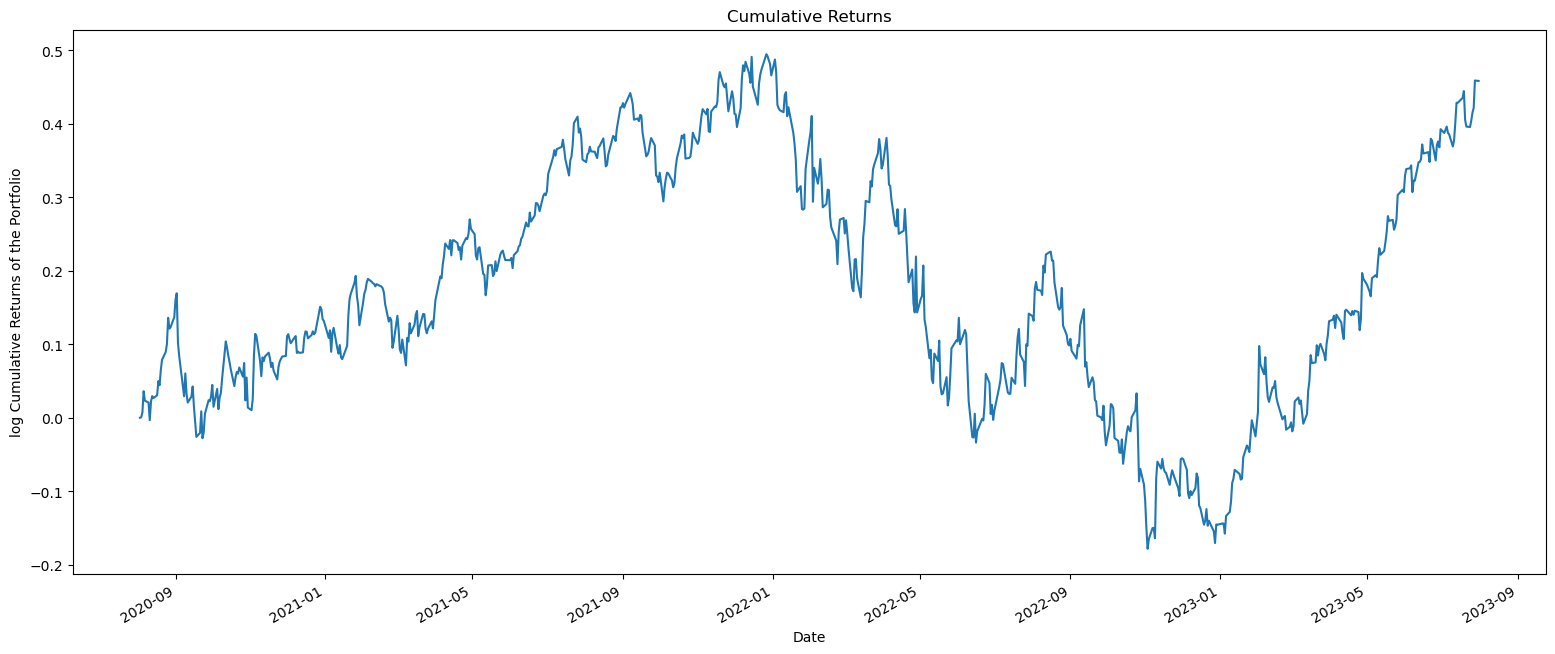

In [40]:
# cummulative returns 

cum_returns_porfolio  =  ((1 + stocks_return[ 'Portfolio'  ]).cumprod()-1)

fig,ax = plt.subplots(1,1,figsize  =  (19,8))
cum_returns_porfolio.plot(ax=ax)

ax.set_title('Cumulative Returns')
ax.set_ylabel('log Cumulative Returns of the Portfolio')
ax.set_xlabel('Date')
plt.show()

## Capital  asset  Pricing  model

- Its major  assumptions  are  that  the  offer  of  financial  assets  is  equal  to  the demand of financial assets.

- Only deals with systematic risk (market risk), that can't be reduced. 

Excess Return = Return − Risk Free Return

$E(R_p) − RF = \beta_p(E(R_m) − RF)$

- $E(R_p) − RF$  =  The excess in the expected return of Portfolio P
- $E(R_m) − RF$  =  The excess expected return of market portfolio
- RF  =  Risk-Free Return
- $\beta_p$   =  Beta of the portfolio

Currently US3Y yeild is 4.54% and inflation is 3.3%

In [41]:
# real risk free rate = RFR - infaltion
infaltion = 3.3
RFR  = 4.54
real_rf = RFR - infaltion

stocks_return[ 'RF Rate'  ]  =  real_rf/100.0

#  Excess return
stocks_return['excess']  =  stocks_return['Portfolio'] - stocks_return[ 'RF Rate'  ]

### Beta 

The measurement of the systematic risk is through the beta, which is a 
degree of sensitivity that includes the variation of an asset compared with 
an index that is used as a benchmark.

$\beta_p = \frac{cov(R_{p},R_{m})}{\sigma_m}$

In [42]:
# To calculate beta

stocks_return['Market']  =  yf.download( 'SPY',start_date,end_date)['Close']

stocks_return['Market']=stocks_return['Market'].pct_change()

stocks_return.head().dropna()


[*********************100%%**********************]  1 of 1 completed


,AAPL,AMZN,GOOGL,META,MSFT,Portfolio,RF Rate,excess,Market
Date,,,,,,,,,
2020-08-04,0.006678,0.008657,-0.006380,-0.008454,-0.015009,0.000629,0.0124,-0.011771,0.003863
2020-08-05,0.003625,0.021091,0.003930,-0.002842,-0.001641,0.006640,0.0124,-0.005760,0.006211
2020-08-06,0.034889,0.006231,0.017484,0.064868,0.016014,0.028666,0.0124,0.016266,0.006685
2020-08-07,-0.024495,-0.017842,-0.004372,0.011912,-0.017888,-0.012410,0.0124,-0.024810,0.000718


In [43]:
# Exess return of the market

stocks_return['excess market']  =  stocks_return['Market'] - stocks_return['RF Rate']
stocks_return.head().dropna()

,AAPL,AMZN,GOOGL,META,MSFT,Portfolio,RF Rate,excess,Market,excess market
Date,,,,,,,,,,
2020-08-04,0.006678,0.008657,-0.006380,-0.008454,-0.015009,0.000629,0.0124,-0.011771,0.003863,-0.008537
2020-08-05,0.003625,0.021091,0.003930,-0.002842,-0.001641,0.006640,0.0124,-0.005760,0.006211,-0.006189
2020-08-06,0.034889,0.006231,0.017484,0.064868,0.016014,0.028666,0.0124,0.016266,0.006685,-0.005715
2020-08-07,-0.024495,-0.017842,-0.004372,0.011912,-0.017888,-0.012410,0.0124,-0.024810,0.000718,-0.011682


In [44]:
# covariance matrix 

covariance_matrix  =  stocks_return[[ 'excess', 'excess market'  ]].cov()
covariance_matrix

,excess,excess market
excess,0.000365,0.000187
excess market,0.000187,0.000132


In [45]:
# covariane coeeficient 
covariance_coefficient  =  covariance_matrix.iloc[0, 1]

# variance of market
variance_coefficient  =  stocks_return['excess market'].var()

# beta of the portfolio
beta  =  covariance_coefficient / variance_coefficient

beta

1.416897406000382

The  beta  demonstrates  that  the  portfolio  is more volatile than the market. The portfolio is 41% more volatile than the S&P 500. For every 1% of movement in the market there will be a 1.41% of rise or fall in the portfolio.

## Sharpe Ratio 

Higher ratio is better it is considered since the denominator is standard deviation or risk. It is used when comparing 
peers, for example in an exchange-traded fund (ETF)

$Sharpe \ Ratio = \frac{R_p-R_f}{
\sigma_p}$

- $R_p$   =  returns of the portfolio
- $R_f$   =  risk-free rate
- $\sigma_p$   =  standard deviation of the portfolio excess returns.


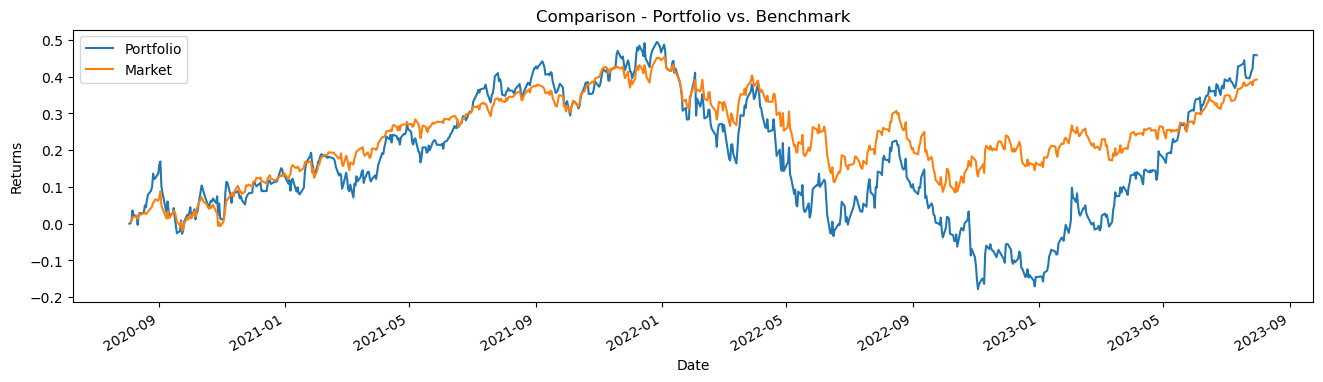

In [51]:
# plot returns of porfolio and market 

CumulativeReturns  =  ((1 + stocks_return[[ 'Portfolio','Market'  ]]).cumprod()- 1  )
CumulativeReturns.plot(figsize   =  ( 16,4  ))
_  =  plt.ylabel( 'Returns'  )
_  =  plt.title( 'Comparison - Portfolio vs. Benchmark'  )
_  =  plt.xlabel( 'Date'  )
plt.show()

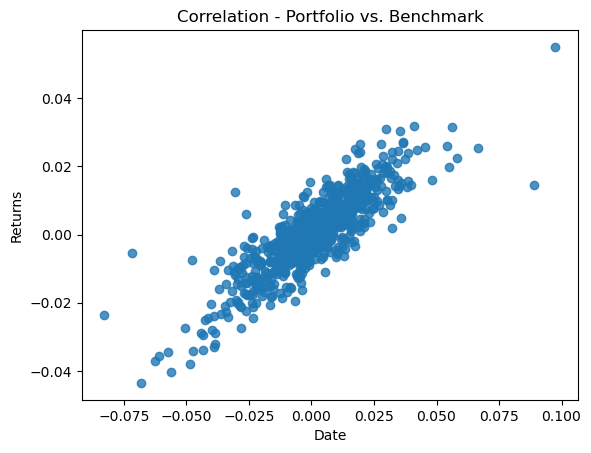

In [50]:
# plot scatter plot for correlation
plt.scatter(stocks_return[ 'Portfolio'  ],stocks_return[ 'Market'],alpha  =   0.80  );
_  =  plt.ylabel( 'Returns'  )
_  =  plt.title( 'Correlation - Portfolio vs. Benchmark'  )
_  =  plt.xlabel( 'Date'  )

In [54]:
# get the two columns in a dataframe
portfolio_benchmark  =  stocks_return[[ 'Portfolio','Market']].dropna()

# get correlation


portfolio_benchmark.corr()

,Portfolio,Market
Portfolio,1.000000,0.851744
Market,0.851744,1.000000


In [58]:
# get sharpe ratio

sharpe_ratio  =  ((stocks_return[ 'Portfolio'  ].mean()  -  stocks_return[ 'RF Rate'  ].mean()))/stocks_return['Portfolio'  ].std()

print("Sharpe ratio is ",sharpe_ratio)
print("Sharpe ratio annual ",sharpe_ratio*np.sqrt(252))


Sharpe ratio is  -0.6131452933469881
Sharpe ratio annual  -9.73337978247526


SR is  negative,  indicates that mean  return  of  the  portfolio  is  smaller  than  the  risk-free  rate. Therefore the portfolio is not effective 

## Traynor ratio

Higher TR is a result of the portfolio management. When analyzing the Traynor Ratio, if it is negative, the portfolio has underperformed the risk-free rate.

$Traynor Ratio = \frac{R_p - R_f}{\beta_p}$

- $R_p$   =  returns of the portfolio
- $R_f$   =  risk-free rate
- $\beta_p$   =  Beta of the portfolio

In [82]:
# covariance
covariance  =  stocks_return.cov() * 252

# covariance between market and portfolio
covariance_market_portfolio  =  covariance.at['Market','Portfolio']

# variance of market
market_variance  =  stocks_return[ 'Market'].var() * 252

# beta of the portfolio
portfolio_beta  =  covariance_market / market_variance

traynor_ratio  =  ((stocks_return['Portfolio'].mean() - stocks_return['RF Rate'].mean()))/portfolio_beta

traynor_ratio


-0.008268904314486599

TR is negative, which means that the port-
folio is not performing better than the risk-free rate. 
Main  difference  between  the  Sharpe  and the  Traynor ratio is that it compares with the beta and not the volatility

## Jensen’s  measure
Measuring the relationship between the return of the portfolio in comparison with another portfolio return with the same risk, same reference market and under the same parameters.

$\alpha = R_p - (R_f + \beta_p(R_m-R_p))$

In [72]:
# get covariance of between market and portfolio
annual_return = stocks_return
covariance = annual_return[[*tech_stocks,'Portfolio','Market']].cov()*252

covariance

,AAPL,MSFT,AMZN,GOOGL,META,Portfolio,Market
AAPL,0.093153,0.064348,0.074747,0.064086,0.081080,0.079273,0.044044
MSFT,0.064348,0.084440,0.076880,0.070369,0.082589,0.073578,0.042132
AMZN,0.074747,0.076880,0.142706,0.081007,0.110047,0.100261,0.049349
GOOGL,0.064086,0.070369,0.081007,0.102456,0.100217,0.081586,0.044204
META,0.081080,0.082589,0.110047,0.100217,0.232736,0.119713,0.054172
Portfolio,0.079273,0.073578,0.100261,0.081586,0.119713,0.092012,0.047174
Market,0.044044,0.042132,0.049349,0.044204,0.054172,0.047174,0.033294


In [76]:
# covariance market

covariance_market = covariance.at['Market','Portfolio']

# variance of market
market_variance  =  stocks_return[ 'Market'  ].var() * 252

# beta of the portfolio
portfolio_beta  =  covariance_market/market_variance

# portfolio return
portfolio_return  =  stocks_return['Portfolio'  ].mean()

# RFR
risk_free_rate  =  stocks_return['RF Rate'].mean()

# alpha
alpha  =  portfolio_return  - (risk_free_rate + portfolio_beta*(portfolio_return - risk_free_rate))

alpha

0.004884448833019478